***
# Image Segementation with k-means by **Kacper Piątkowski**



The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. \
It accomplishes this using a simple conception of what the optimal clustering looks like:

    The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
    Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the k-means model.
***

## **Algorithm**

Κ-means clustering algorithm inputs are the number of clusters Κ and the data set. \
Algorithm starts with initial estimates for the Κ centroids, which can either be randomly generated or randomly selected from the data set. \
The algorithm then iterates between two steps:

1. Data assigment step \
    Each centroid defines one of the clusters. In this step, each data point based on the squared Euclidean distance is assigned to its nearest centroid. 

2. Centroid update step \
    Centroids are recomputed by taking the mean of all data points assigned to that centroid's cluster. \
    The algorithm iterates between step one and two until a stopping criteria is met (no data points change clusters, the sum of the distances is minimized, or some maximum number of iterations is reached). \
    This algorithm may converge on a local optimum. Assessing more than one run of the algorithm with randomized starting centroids may give a better outcome.

<center> <img src="img/clustering.gif" width="750"> </center>

***

## **Choosing K**

If the true label is not known in advance, then K-Means clustering can be evaluated using Elbow Criterion , Silhouette Coefficient , cross-validation, information criteria, the information theoretic jump method, and the G-means algorithm but we won't be using those.

***

### The objective of K-Means clustering is to minimize the sum of squared distances between all points and the cluster center.

<center> 
    <img src="https://miro.medium.com/max/1104/1*riInbzp5CiuMOOq8rldQ7w.png" align="center">
</center>

***

In [327]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

img_path = 'img'

In [328]:
filepath = f'{img_path}/image1.jpg'
img = cv2.imread(filepath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

**Reshaping np array in 2D to perform k-means**

In [329]:
vectorized = np.float32(img.reshape((-1, 3)))
print(vectorized.shape)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

(4915200, 3)


In [330]:
# HELPER FUNCTIONS

def draw(img, title):
    plt.imshow(img)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])

def get_kmeans_img(img, vectorized, criteria, K, attempts=10):
    _, label, center = cv2.kmeans(vectorized, K, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)
    label = label.flatten()
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))
    return result_image

def show_means(img, vectorized, criteria, K):
    result_image = get_kmeans_img(img, vectorized, criteria, K)
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    draw(img, 'Original image')
    plt.subplot(1, 2, 2)
    draw(result_image, f'Segmented Image when K = {K}')
    plt.show()
    return result_image

def show_edge(img):
    edges = cv2.Canny(img, 150, 200)
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    draw(img, 'Original image')
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Image')
    plt.xticks([])
    plt.yticks([])
    plt.show()

***

# **1. Comparing Original and Segmented image**

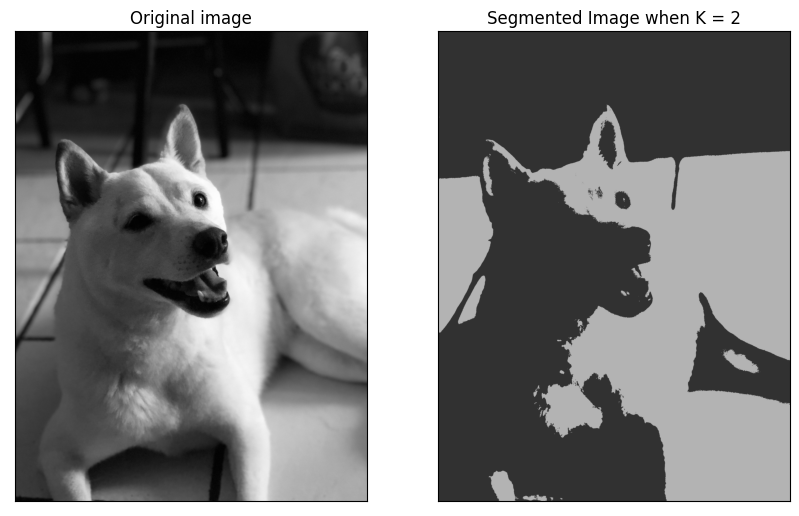

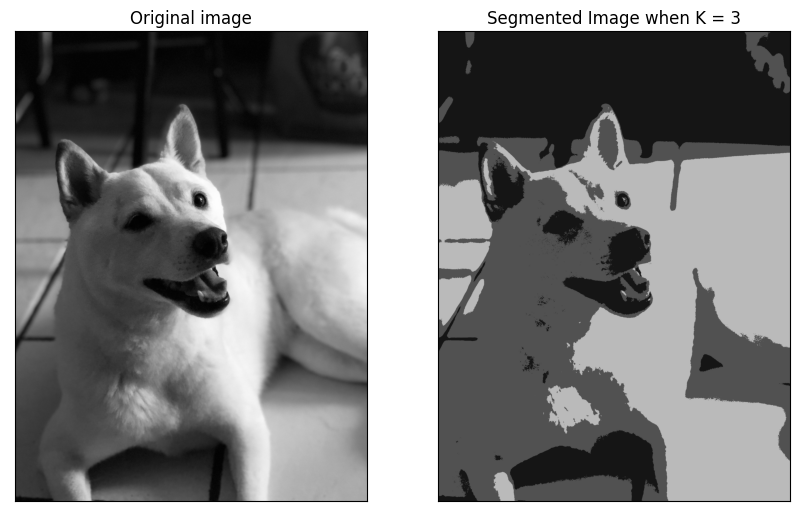

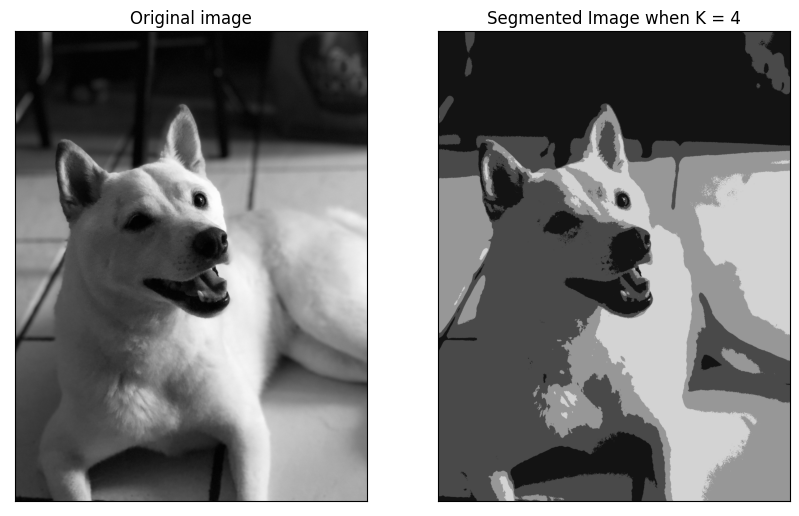

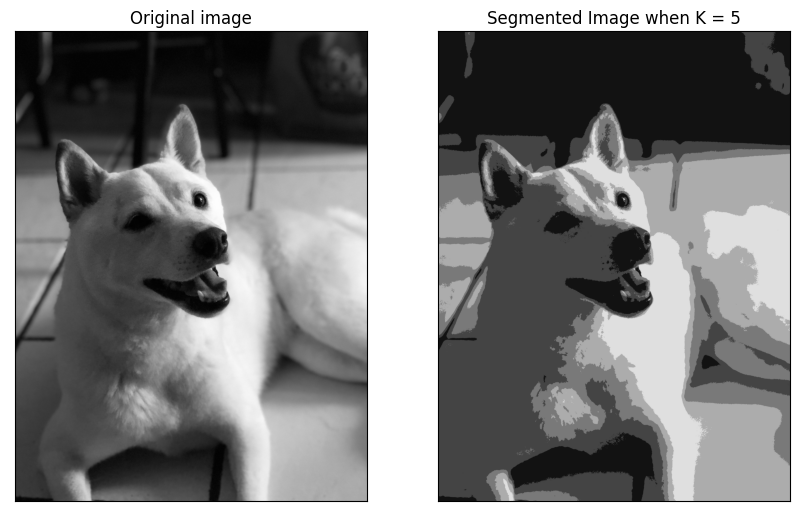

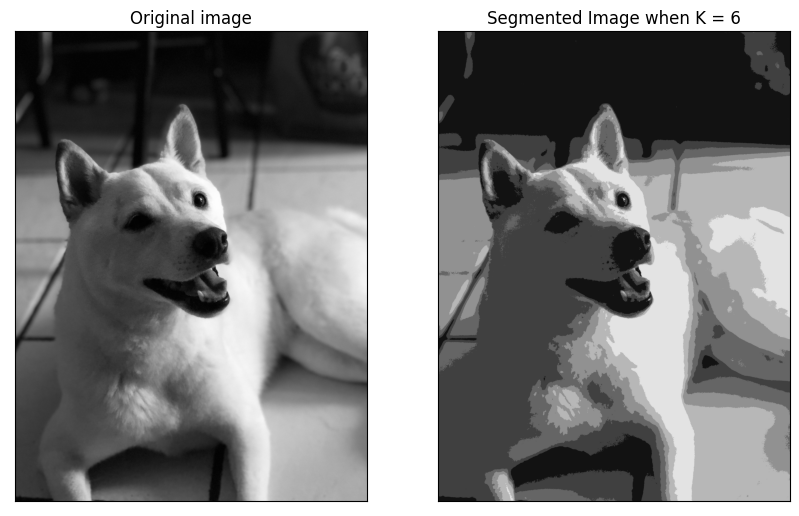

In [331]:
segmented = list(map(lambda k: show_means(img, vectorized, criteria, K=k), [2, 3, 4, 5, 6]))

## Note:
We can see that by increasing the K value our segmented image begins to look a lot more like the original one and also the depth and sharpness of the segmented image gets better with bigger K value

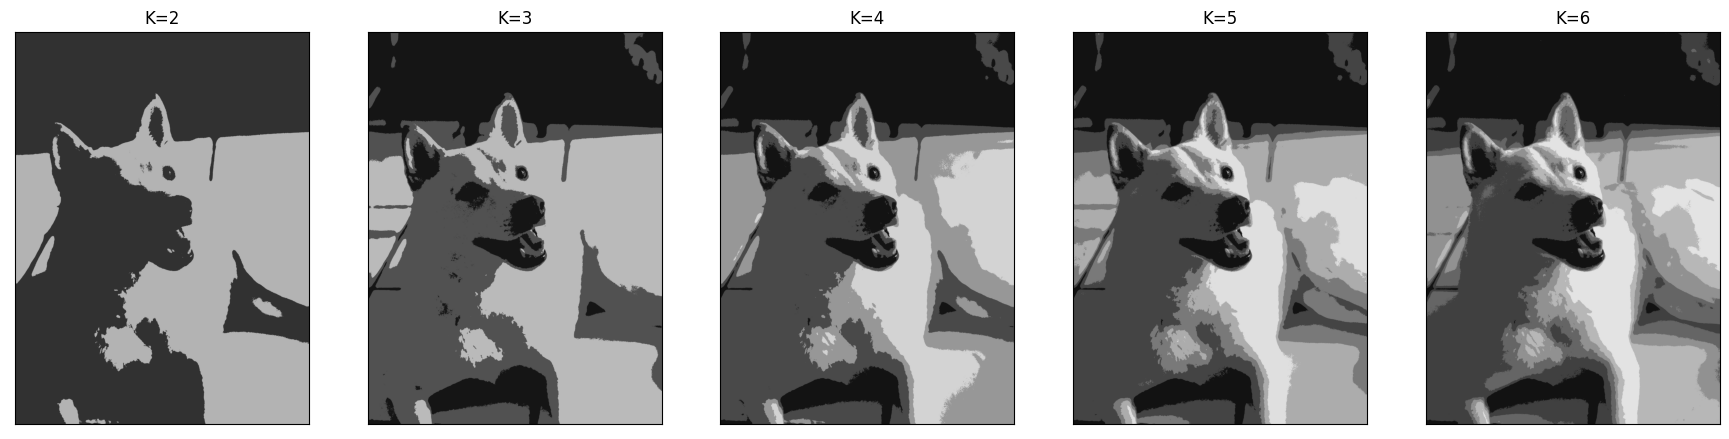

In [332]:
fig = plt.figure(figsize=(22, 8))
grid = plt.GridSpec(1, 5)
for i, seg_img in enumerate(segmented, start=2):
    plt.subplot(grid[i-2])
    plt.imshow(seg_img)
    plt.title(f'K={i}')
    plt.xticks([])
    plt.yticks([])
plt.show()

## Note:
The thing I noticed when looking at the different segmented pictures is the depth of the picture - every picture looks like a layer that is put on top the previous one to form the next one - which we will see also in the next ones. 
***

# **2. Identifying Edges in Image**

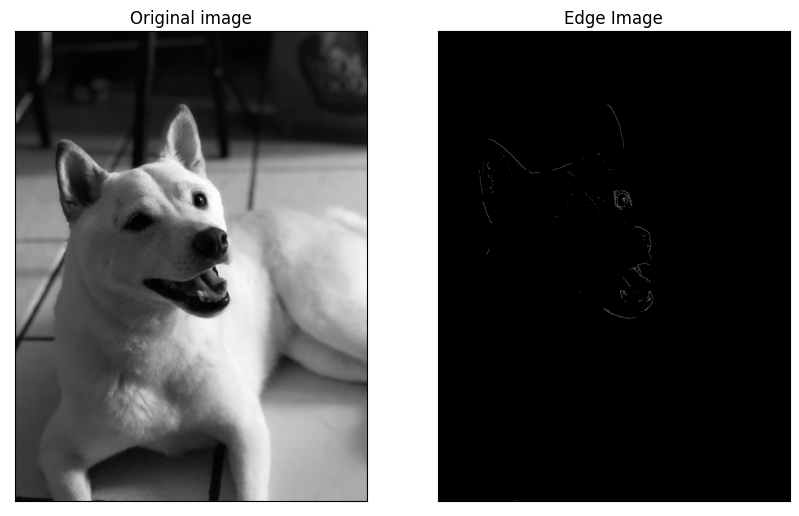

In [333]:
show_edge(img)

## Note:
Unfortunately we don't achieve a big success in finding picture edges when using [Canny Edge Detector](https://en.wikipedia.org/wiki/Canny_edge_detector) (built in cv2 module) - maybe the chosen dog is just too smooth.

***

In [334]:
# HELPER FUNCTION

def show(filepath):
    img = cv2.imread(filepath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    vectorized = np.float32(img.reshape((-1, 3)))
    print(vectorized.shape)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    segmented = list(map(lambda k: get_kmeans_img(img, vectorized, criteria, K=k), [2, 3, 4, 5, 6]))
    plt.figure(figsize=(12,4))
    draw(img, title='Original image')
    plt.show()
    fig = plt.figure(figsize=(22, 8))
    grid = plt.GridSpec(1, 5)
    for i, seg_img in enumerate(segmented, start=2):
        plt.subplot(grid[i-2])
        plt.imshow(seg_img)
        plt.title(f'K={i}')
    plt.xticks([])
    plt.yticks([])
    plt.show()
    show_edge(img)


# **3. Trying colored image**

(11350404, 3)


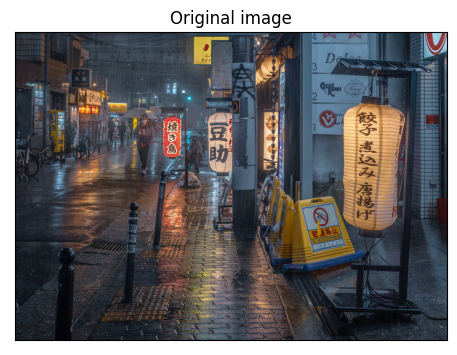

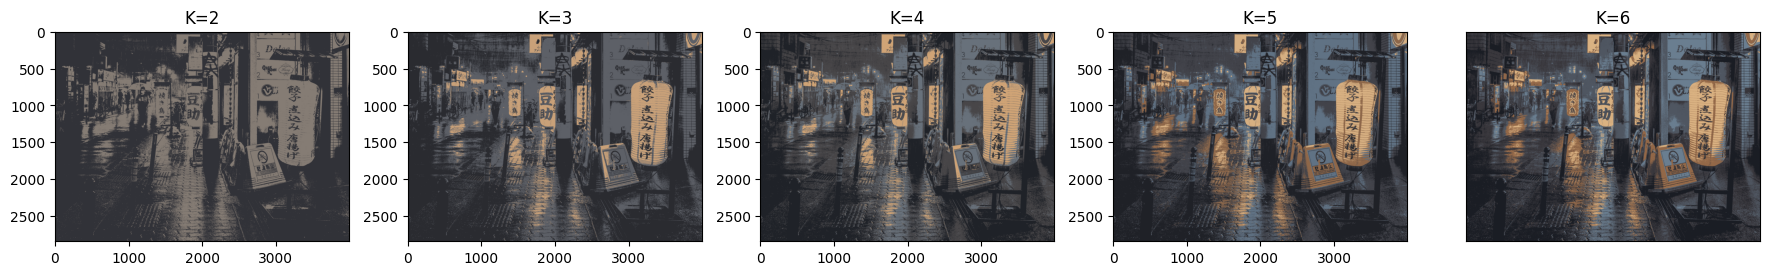

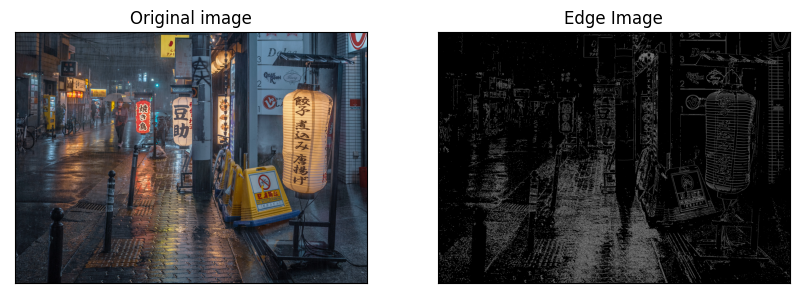

In [335]:
show(f'{img_path}/image2.jpg')

## Note:
We can see a significant difference when looking at the background for different K values - the 'color blob' dissapears and the picture gets sharper. \
The picture with K=6 has also very eye pleasing colors.

The edge image looks a lot better than the previous one - it has much more detail to it and we even can point out some of the items.

***

# **4. The image containing mostly one color**

(4608000, 3)


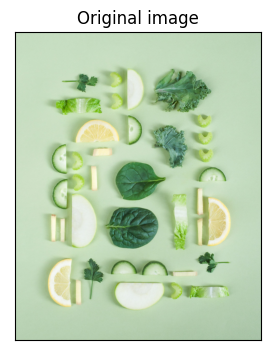

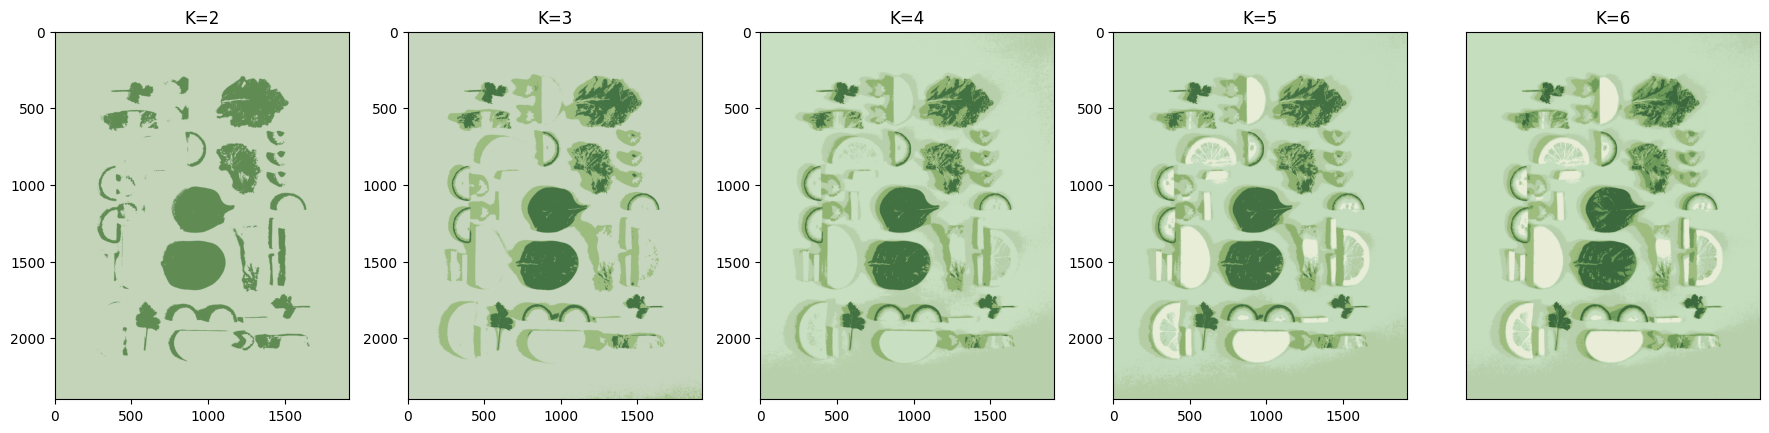

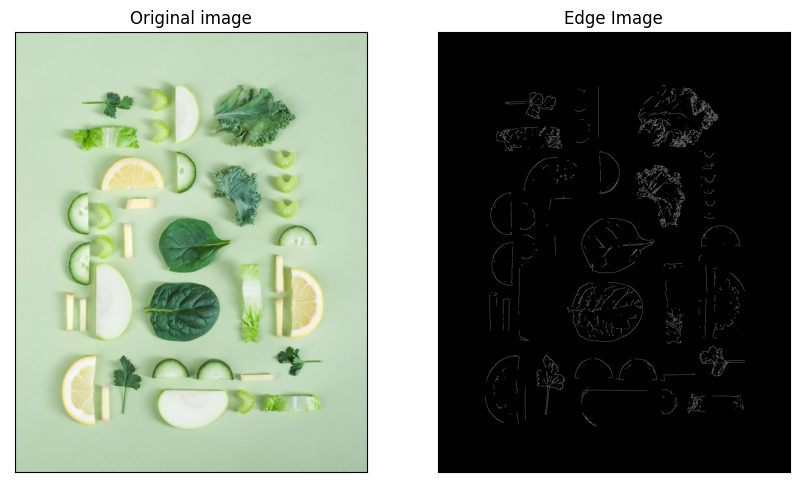

In [336]:
show(f'{img_path}/image3.jpg')

## Note:
I wanted to check what would happen if the picture contained mostly one colour in different hue and what I found interesting is what I said earlier, every next one is like putting another layer onto it.

The edges were succesfully found but mostly on the bigger items.

***

# **5. Image with 2 colors - blue and green**

(2459520, 3)


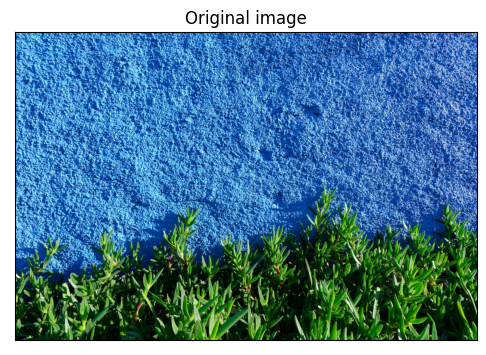

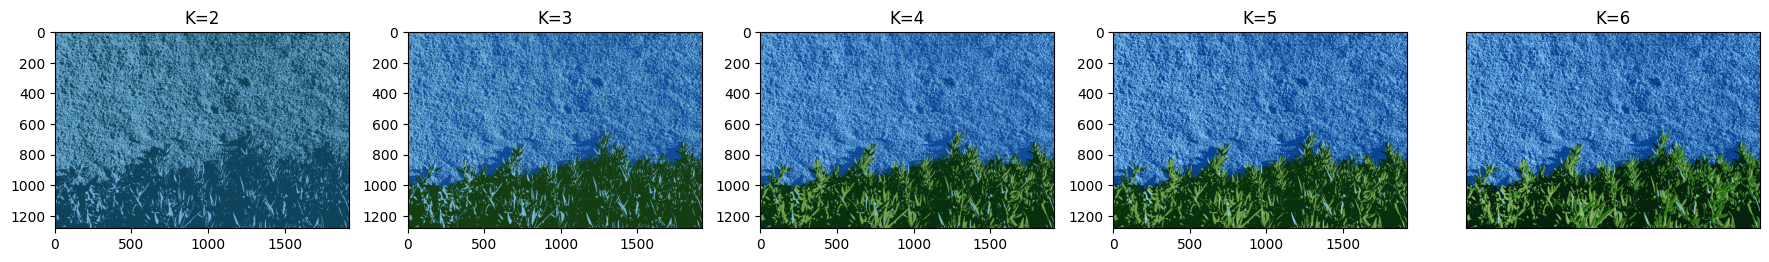

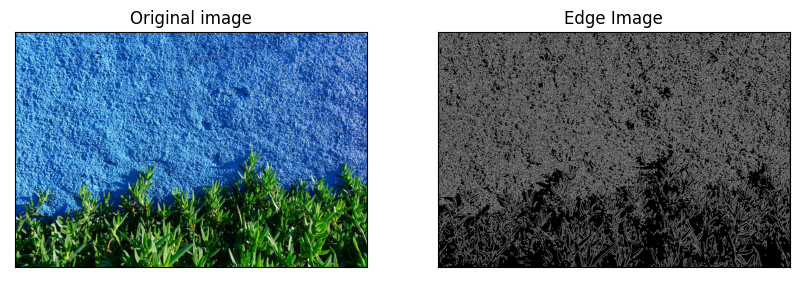

In [337]:
show(f'{img_path}/image4.jpg')

## Note:
We got really nice results with K=5 and K=6 - they gained a lot of sharpness.

The edge image isn't as succesful as the previous one because of the texture in the image making it hard to separate the grass from the wall (preasumably)

***

# **6. Color to represent Cluster for K=5**

In [338]:
def centroid_histogram(clt):
	# grab the number of different clusters and create a histogram
	# based on the number of pixels assigned to each cluster
	numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
	(hist, _) = np.histogram(clt.labels_, bins = numLabels)
	
    # normalize the histogram
	hist = hist.astype("float")
	hist /= hist.sum()
	return hist

def plot_colors(hist, centroids):
	# bar chart representing the relative frequency of each of the colors
	bar = np.zeros((50, 300, 3), dtype = "uint8")
	startX = 0
 
	# loop over the percentage of each cluster and the color of each cluster
	for (percent, color) in zip(hist, centroids):
		# relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(
            bar, 
            (int(startX), 0), 
            (int(endX), 50),
			color.astype("uint8").tolist(), 
            -1
        )
		startX = endX
	
	return bar

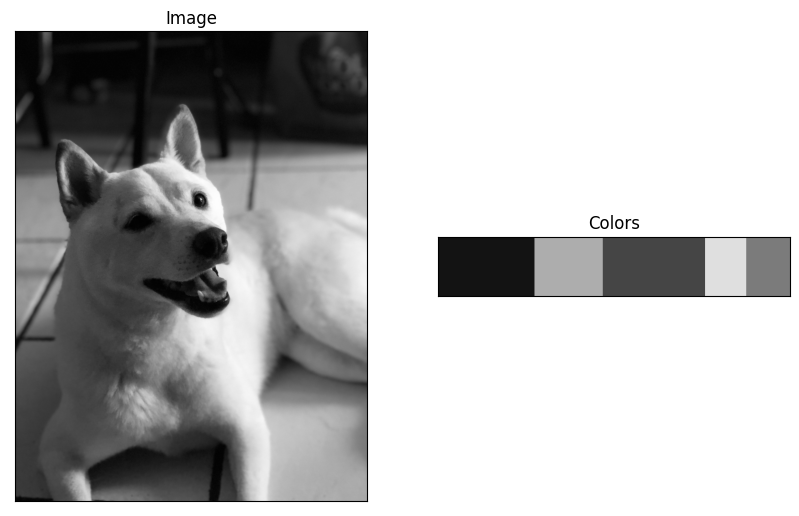

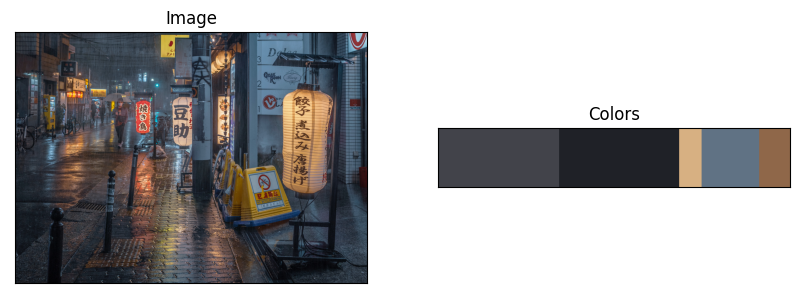

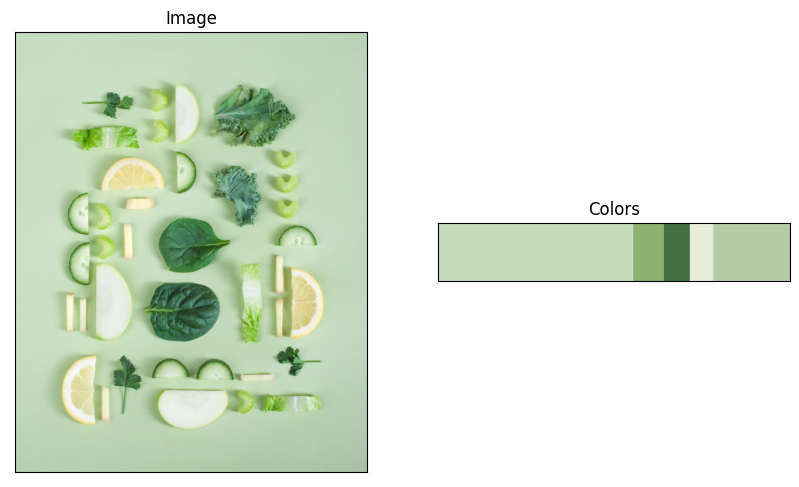

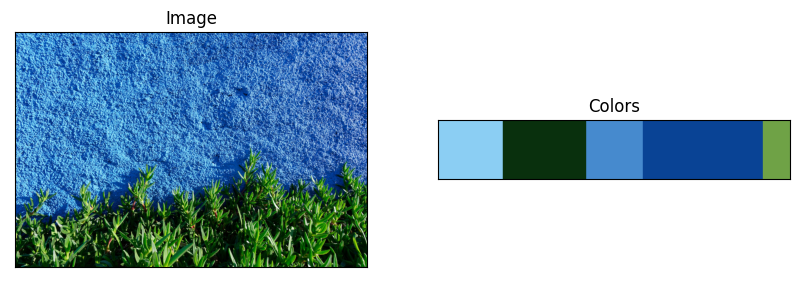

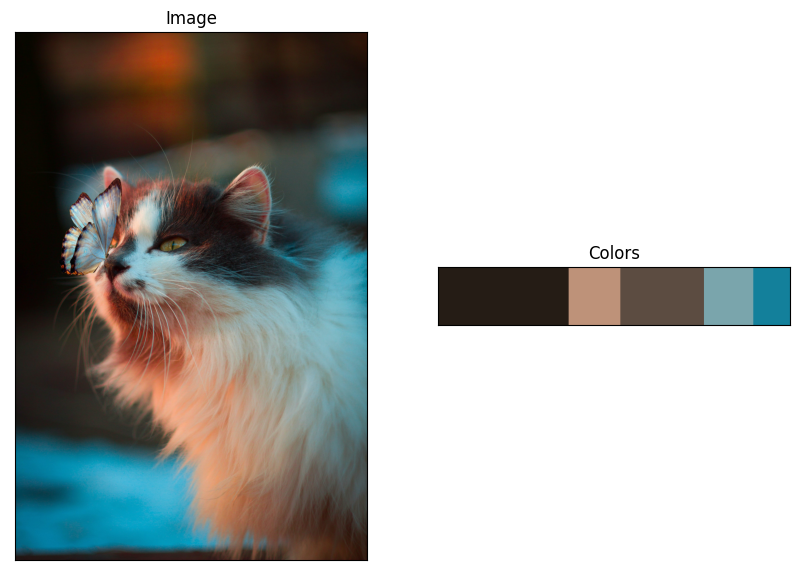

In [339]:
for file in [f'{img_path}/image{i}.jpg' for i in range(1,6)]:
    image = cv2.imread(file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img = image
    image = image.reshape((image.shape[0] * image.shape[1], 3))

    clt = KMeans(n_clusters = 5)
    clt.fit(image)

    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)
    
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    draw(img, 'Image')
    plt.subplot(1, 2, 2)
    draw(bar, 'Colors')
    plt.show()

## Note:
We can see that the colors for the images containing least different colors the colorbar gets dominated by 1/2 colors that we would guess from looking at the picture with naked eye. \
On the other hand the pictures with more colors are dominated by gray-ish and dark-sih colors, since the K=5

***